## investigating martingales

how to run this notebook: conda environment with python, numpy and matplotlib

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [17]:
def determine_stopping_value(
    length_losing_run: int = 1,
    n_walks: int = 1000,
    length_single_run: int = 10000,
    seed: int = 0,
):
    rng = np.random.default_rng(seed=seed)
    steps = rng.choice([-1,1], size=(n_walks, length_single_run))

    lags = [
        steps[:,i:length_single_run-length_losing_run+i] == -1
        for i in range(length_losing_run)
    ]

    start_of_run = np.logical_and.reduce(lags)
    first_run = np.argmax(start_of_run, axis=1)
    walks = np.add.accumulate(steps.T).T

    s_T_values = walks[np.arange(n_walks), first_run-1+length_losing_run]
    
    return s_T_values

(array([249., 121.,  61.,  22.,  13.,   0.,   1.,   6.,   2.,   2.,   1.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 11 artists>)

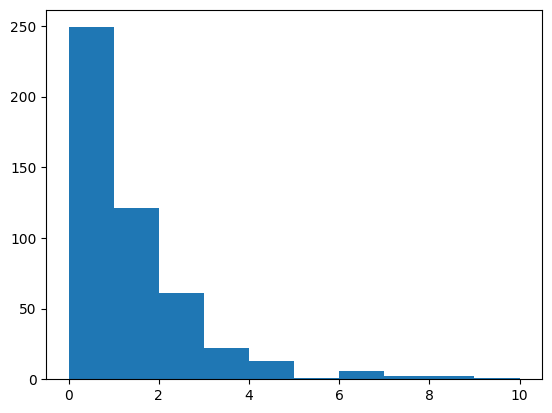

In [18]:
s_T_values = determine_stopping_value(
    length_losing_run=1,
    n_walks = 1000,
    length_single_run = 50,
)

plt.hist(s_T_values, bins = [0,1,2,3,4,5,5,6,7,8,9,10])

0.086
8.451544474236647


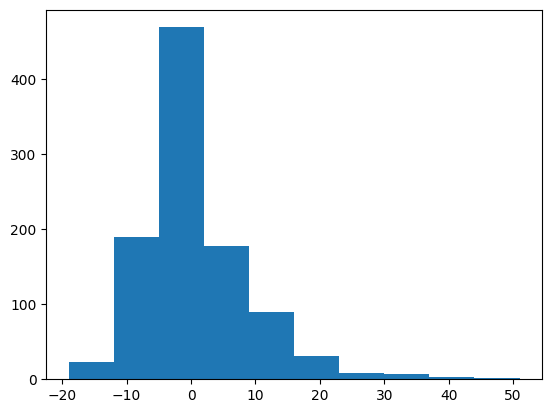

In [23]:
s_T_values = determine_stopping_value(
    length_losing_run=5,
    n_walks = 1000,
    length_single_run = 100000,
)

plt.hist(s_T_values)
print(s_T_values.mean())
print(s_T_values.std())

0.086

In [2]:
losing_run=1
seed=0
n_walks=100000
length_single_run=1000

rng = np.random.default_rng(seed=seed)

steps = rng.choice([-1,1], size=(n_walks, length_single_run))


In [3]:
lags = [
    steps[:,i:length_single_run-losing_run+i] == -1
    for i in range(losing_run)
]

In [5]:
start_of_run = np.logical_and.reduce(lags)

In [6]:
first_run = np.argmax(start_of_run, axis=1)

In [7]:
walks = np.add.accumulate(steps.T).T

In [12]:
s_T_values = walks[np.arange(n_walks), first_run-1+losing_run]

In [13]:
s_T_values.mean()

-0.00071

(array([25154., 12337.,  6336.,  3129.,  1572.,   769.,   383.,   185.,
           99.,    72.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

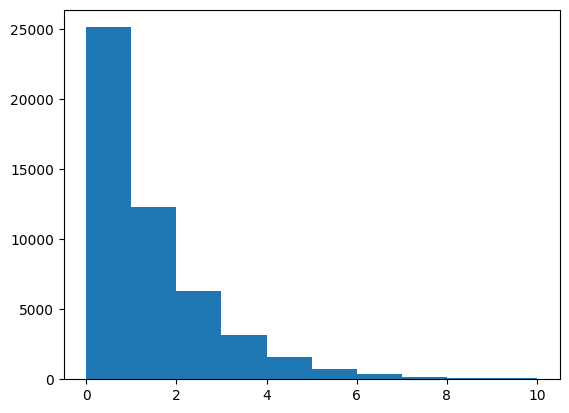

In [16]:
plt.hist(s_T_values, bins=[0,1,2,3,4,5,6,7,8,9,10])